In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
df=pd.read_excel('B:\spyder\AirPollution.xls')


In [67]:
df.head()

,PM10,Pb,Cd,Cu,Cr,Zn,NOx,SO2,Site,Unnamed: 9,Season
0,120.71,2.67,0.01,0.53,0.61,0,84.17,40.37,Mandai,2004-02-07,Summer
1,140.25,3.49,0.02,0.10,0.91,0,88.81,39.48,Mandai,2004-02-14,Summer
2,107.01,1.31,0.01,0.19,0.48,0,81.49,48.29,Mandai,2004-02-21,Summer
3,88.81,0.76,0.00,0.33,0.39,0,61.80,27.42,Mandai,2004-02-28,Summer
4,75.05,0.60,0.00,0.41,1.54,0,48.71,19.23,Mandai,2004-03-06,Summer


In [68]:
df_copy=pd.DataFrame.copy(df)

In [69]:
df_copy.head(10)

,PM10,Pb,Cd,Cu,Cr,Zn,NOx,SO2,Site,Unnamed: 9,Season
0,120.71,2.67,0.01,0.53,0.61,0,84.17,40.37,Mandai,2004-02-07,Summer
1,140.25,3.49,0.02,0.10,0.91,0,88.81,39.48,Mandai,2004-02-14,Summer
2,107.01,1.31,0.01,0.19,0.48,0,81.49,48.29,Mandai,2004-02-21,Summer
3,88.81,0.76,0.00,0.33,0.39,0,61.80,27.42,Mandai,2004-02-28,Summer
4,75.05,0.60,0.00,0.41,1.54,0,48.71,19.23,Mandai,2004-03-06,Summer
5,64.41,0.52,0.00,0.69,0.42,0,30.47,17.46,Mandai,2004-03-13,Summer
6,78.11,1.17,0.00,0.13,0.24,0,28.80,11.07,Mandai,2004-03-20,Summer
7,64.41,2.53,0.00,0.09,0.38,0,21.52,14.42,Mandai,2004-03-27,Summer
8,67.95,0.95,0.00,0.07,0.19,0,26.08,16.68,Mandai,2004-04-03,Summer
9,56.80,0.78,0.00,0.07,0.20,0,23.41,14.09,Mandai,2004-04-10,Summer


In [70]:
df_copy=df_copy.drop(['Site','Unnamed: 9','Season'],axis=1)


In [71]:
df_copy.Zn.value_counts
df_copy=df_copy.drop('Zn',axis=1)

In [72]:
correlation_matrix = df_copy.corr()


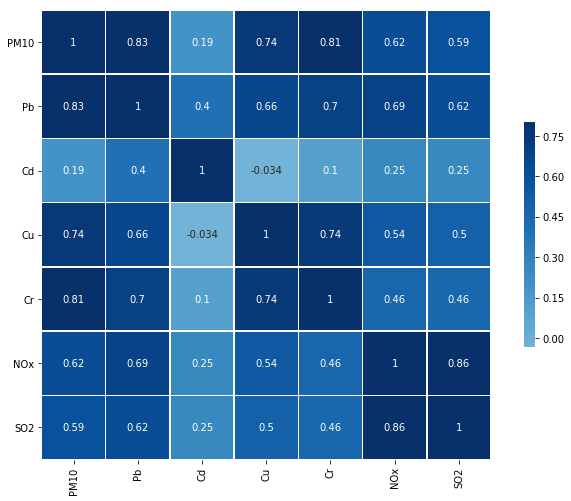

In [73]:
a4_dimens = (11.7 , 8.27)
fig , ax = plt.subplots(figsize = a4_dimens)
sns.heatmap(correlation_matrix, cmap="Blues", vmax=.8, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5} , annot=True,
            xticklabels=correlation_matrix.columns.values ,
            yticklabels=correlation_matrix.columns.values,
            ax = ax)

plt.xticks(rotation = 90)
plt.yticks(rotation = 360)
plt.show()

In [74]:
del df_copy["SO2"]


In [75]:
df_copy.Cd.value_counts
del df_copy["Cd"]

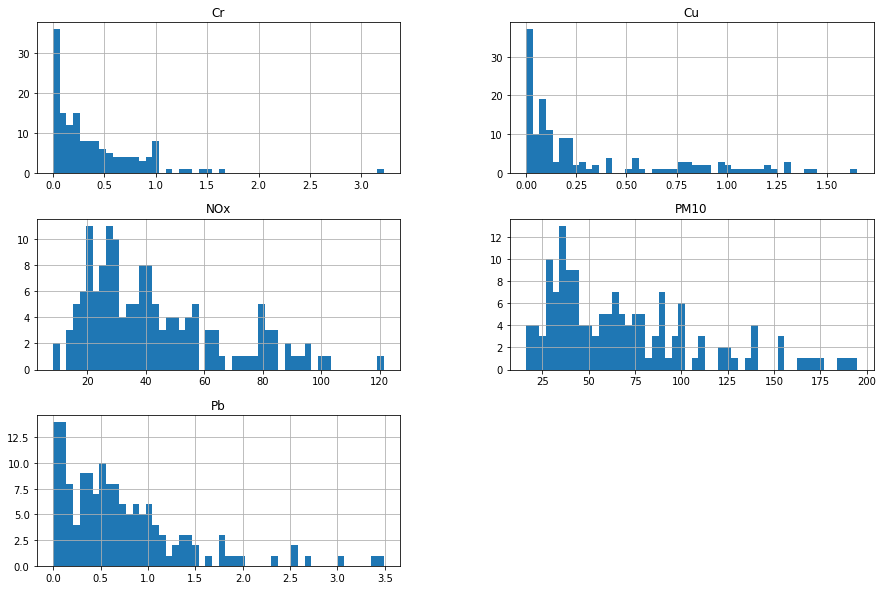

In [76]:
df_copy.hist(bins=50,figsize=(15,10))
plt.show()

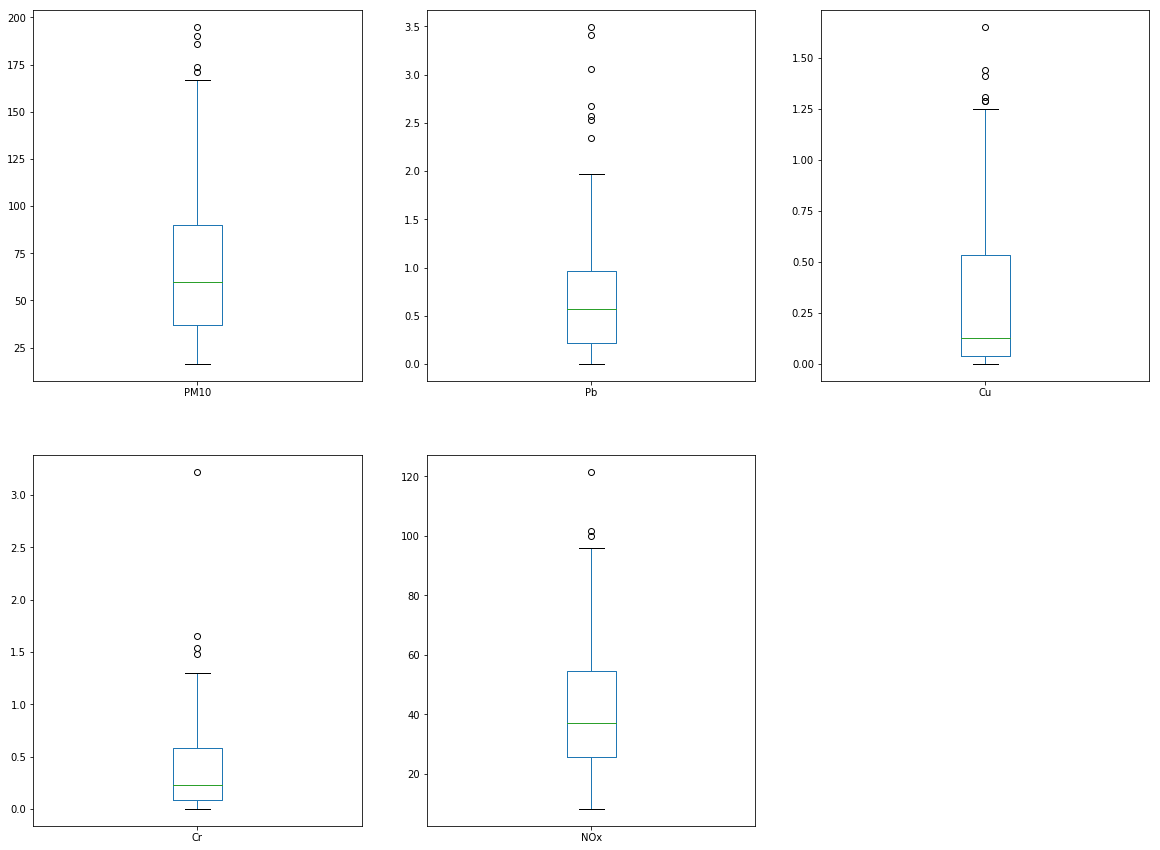

In [77]:
df_copy.plot(kind="box", subplots=True,layout=(2,3),figsize=(20,15),sharex=False)
plt.show()

In [78]:
fin_columns = ["PM10" , "Pb" , "Cu" , "Cr" , "NOx"]
for outlier in fin_columns:
     B= plt.boxplot(df_copy[outlier])
     value = [item.get_ydata()[1] for item in B['whiskers']]
     upper_whisker = value[1]
     df_copy[outlier][df_copy[outlier] > upper_whisker] = upper_whisker

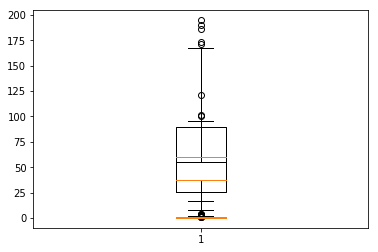

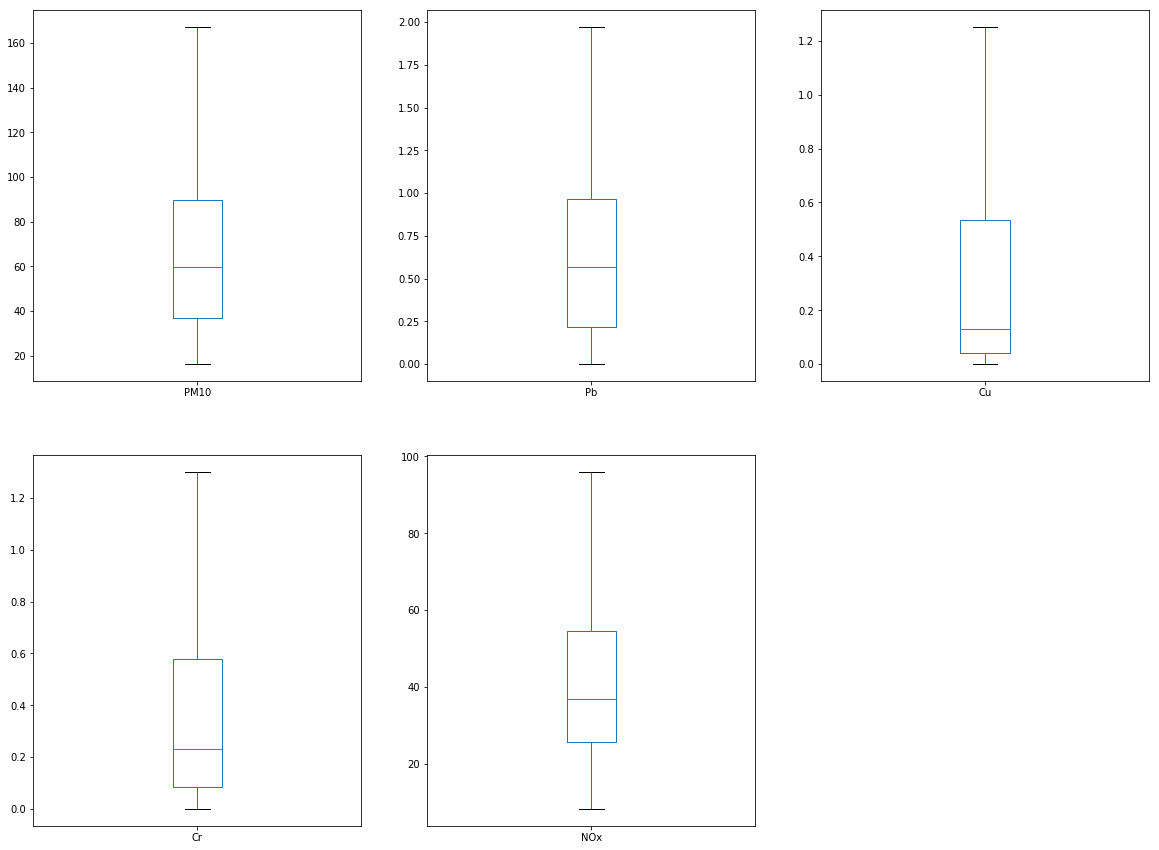

In [79]:
df_copy.plot(kind="box", subplots=True,layout=(2,3),figsize=(20,15),sharex=False)
plt.show()

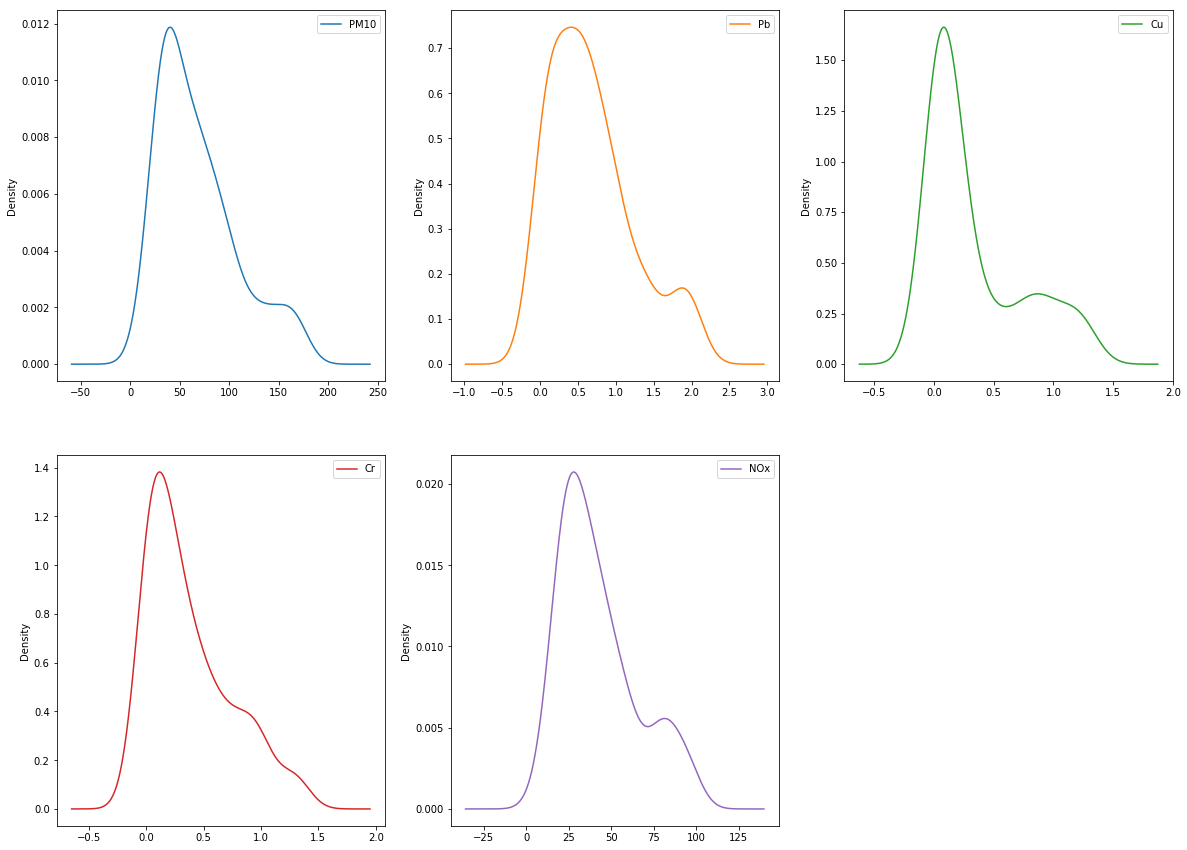

In [80]:
df_copy.plot(kind="density", subplots=True,layout=(2,3),figsize=(20,15),sharex=False)
plt.show()

In [81]:
####Creating traing and test data....
y=df_copy.values[:,0:1]
x=df_copy.values[:,1:]

In [82]:
x0 = np.ones([x.shape[0],1])

In [83]:
x = np.concatenate((x0,x) , axis = 1)


In [84]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,
                                         y,
                                         test_size = 0.30, 
                                         random_state = 10)

In [85]:
###Cost function
def costFunction(x,y,theta):
    costF = ( (x @ theta.T) - y)**2
    return sum(costF)/(2*len(x))

In [86]:
###Gradient Descent........
    

def gradientDescent (x,y,theta ,learningRate ,i):
    cost = np.zeros(i)
    for n in range(i):
        theta = theta - (learningRate/len(x))* np.sum(x*((x @ theta.T)-y) , axis = 0)
        cost[n] = costFunction(x,y,theta)
        
    return theta , cost

In [87]:
theta = np.zeros([1,df_copy.shape[1]])
print(theta)

[[ 0.  0.  0.  0.  0.]]


In [88]:
alpha=0.0001
iteration=250000

In [89]:
coef , costs = gradientDescent(x_train ,
                               y_train , 
                               theta , 
                               alpha , 
                               iteration)

print("theta0,theta1,theta2,theta3 : ")
print(coef)

theta0,theta1,theta2,theta3 : 
[[  2.44181439e+01   3.30548262e+01   1.92030410e+01   3.73619503e+01
    2.16878300e-02]]


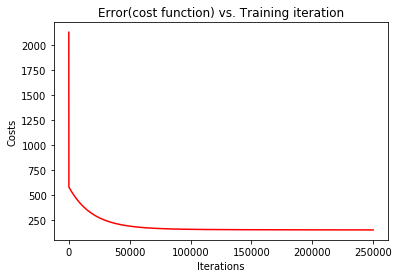

In [90]:
plt.plot(np.arange(iteration), costs, 'r')  
plt.xlabel('Iterations')  
plt.ylabel('Costs')  
plt.title('Error(cost function) vs. Training iteration')
plt.show()

In [91]:
final_cost = costFunction(x_train,y_train,coef)
print(final_cost)

[ 148.78461777]


In [92]:
##Testing the model
def linearRegression(x ,thetas):
    #linear regression : h(x) = theta0 + theta1 * x1 + .....+ thetan * xn
    pred_y =  x @ thetas.T 
    
    return pred_y

In [93]:
pred_y = linearRegression(x_test,coef)
pred_y

array([[ 137.71319405],
       [  32.5461986 ],
       [  57.38873002],
       [  48.32914577],
       [  49.06813199],
       [  85.10804434],
       [ 108.81959037],
       [  79.64101439],
       [ 108.6639661 ],
       [  65.36152929],
       [ 108.68266426],
       [  25.0800565 ],
       [ 107.26693235],
       [ 127.38192649],
       [ 152.98306719],
       [  34.63131081],
       [  37.07009208],
       [ 120.60051402],
       [ 102.62836416],
       [ 155.95943847],
       [  59.82247067],
       [  31.70765694],
       [  52.59467443],
       [  79.24511716],
       [  24.99829338],
       [  91.06962139],
       [  29.26696992],
       [  80.20329755],
       [  92.28279813],
       [  59.34452602],
       [  65.56968537],
       [  93.84901042],
       [ 117.96250406],
       [  44.20692303],
       [  29.22600514],
       [  48.96268687],
       [  82.27034846],
       [  44.75650295],
       [  32.06353719],
       [ 103.72866735],
       [  62.78530111],
       [  62.162

In [94]:
from sklearn.metrics import r2_score
print("r2 = " , r2_score(y_test,pred_y))

r2 =  0.799834051713


In [95]:
residuals = (y_test -  pred_y)
print(np.mean(residuals))

0.582959549527


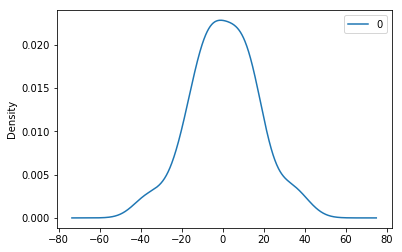

In [96]:
pd.DataFrame(residuals).plot(kind = "density" )
plt.show()